![Risk](img/Risk.png)

## Assignment 5 Risk

The program should simulate 1000 individual battle rounds in Risk (3 attackers vs 2 defender) and plot the result.

For extra marks: a more complicated version that simulates a full series of rounds for armies of arbitrary sizes, until one side is wiped out.

### Rules of Risk

In Risk one army fights another using 6 sided dice.

In each battle round, the attacker can put forward up to three of their troops (3 dice).

The defender can use up to two of their defending troops (2 dice).

Each side looses troops depending on the following rules:

1. The two top dice dice are compared (ie the attackers top dice roll with the defenders top dice roll).
    If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher).
2. The next two highest dice from each side are then compared (ie the attackers second highest to the defenders second highest).
    If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher).

Author: Irene Kilgannon

In [1]:
# Import modules
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
def roll_dice(num_dice):
    '''A function to simulate the rolling of any number of dice and create a list of the results of the dice rolls sorted in descending order.

    Arguments: 
        num_dice (int): the number of dice to roll.'''
    
    # Simulate the dice rolls
    roll_results = [random.randint(1, 6) for _ in range(num_dice)]

    # Return a list sorted in descending order.
    return sorted(roll_results, reverse=True)

The defender lost the battle.
 Attackers Losses: 933
 Defenders Losses: 1067


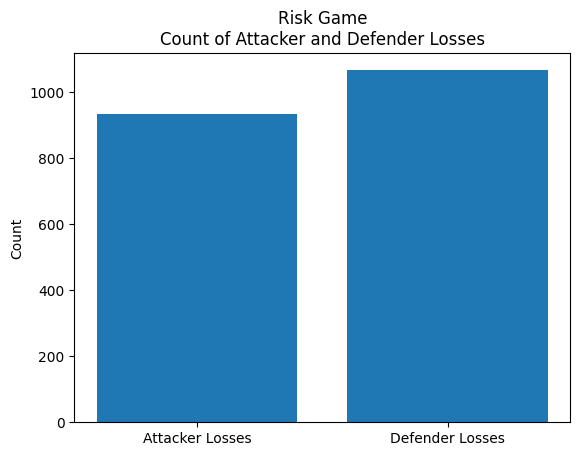

In [3]:
def calculate_losses(attacker_dice, defender_dice):
    '''A function to compare the dice values of the attacker and the defender for each round. To keep track of the round losses the values are added to a list.

    Arguments: 
        attacker_dice: A list of 3 values created by roll_dice function
        defender_dice: A list of 2 values created by the roll_dice function
    '''

    # Counter to keep track of the losses in a round
    round_attacker_losses = 0
    round_defender_losses = 0

    # Zip the attacker dice and defender lists
    for a, d in zip(attacker_dice, defender_dice):
        # Compare the values of the dice rolls
        # a = value in attacker list, d = value in defender list
        if  a <= d:
            round_attacker_losses += 1
        else:
            round_defender_losses += 1

    return round_attacker_losses, round_defender_losses


def simulate_battle(num_rounds):
    '''Simulate the a battle
    Argument: 
        num_rounds (int): The number of battle rounds to simulate.'''

    # Lists to keep track of the overall looses.
    attacker_losses = 0
    defender_losses = 0

    # A list of a dictionary to keep track of the round number, dice rolls and the score for each round.
    round_scores = []

    # Play the game
    for round in range(1, num_rounds + 1):
        # Roll the attacker dice
        attacker_dice = roll_dice(3)

        # Roll the defender dice
        defender_dice = roll_dice(2)

        # Use calculate_losses function.
        round_attacker_losses, round_defender_losses = calculate_losses(attacker_dice, defender_dice)

        # Add the values of the round attacker losses to attacker loses.
        # To keep track of the overall losses
        attacker_losses += round_attacker_losses
        defender_losses += round_defender_losses
        
    	# Append the round scores to 
        round_scores.append({
            'round': round,
            'attacker_dice': attacker_dice,
            'defender_dice': defender_dice,
            'round_attacker_losses': round_attacker_losses,
            'round_defender_losses': round_defender_losses})

    return attacker_dice, defender_dice, attacker_losses, defender_losses, round_scores


def plot_results(attacker_losses, defender_losses):
    '''A function to create a bar plot of the total number of losses for the attacker and defender.'''

    if attacker_losses > defender_losses:
        print(f'The attacker lost the battle.\n Attackers Losses: {attacker_losses}\n Defenders Losses: {defender_losses}')
    else:
        print(f'The defender lost the battle.\n Attackers Losses: {attacker_losses}\n Defenders Losses: {defender_losses}')

    y = np.array([attacker_losses, defender_losses])
    x = np.array(['Attacker Losses', 'Defender Losses'])

    plt.bar(x, y)

    plt.ylabel('Count')
    plt.title('Risk Game\nCount of Attacker and Defender Losses')
    plt.show()


# https://realpython.com/python-return-statement/#returning-multiple-values

attacker_dice, defender_dice, attacker_losses, defender_losses, round_scores = simulate_battle(1000)

#display_results( attacker_losses, defender_losses)
plot_results(attacker_losses, defender_losses)

In [4]:
# Convert round_scores to a dataframe
round_scores = pd.DataFrame(round_scores)
round_scores.head()

,round,attacker_dice,defender_dice,round_attacker_losses,round_defender_losses
0,1,"[5, 1, 1]","[6, 4]",2,0
1,2,"[5, 4, 1]","[4, 1]",0,2
2,3,"[4, 3, 1]","[5, 3]",2,0
3,4,"[6, 6, 5]","[3, 1]",0,2
4,5,"[3, 3, 3]","[4, 1]",1,1


In [5]:
round_scores = round_scores.set_index('round')
round_scores.head()

,attacker_dice,defender_dice,round_attacker_losses,round_defender_losses
round,,,,
1,"[5, 1, 1]","[6, 4]",2,0
2,"[5, 4, 1]","[4, 1]",0,2
3,"[4, 3, 1]","[5, 3]",2,0
4,"[6, 6, 5]","[3, 1]",0,2
5,"[3, 3, 3]","[4, 1]",1,1


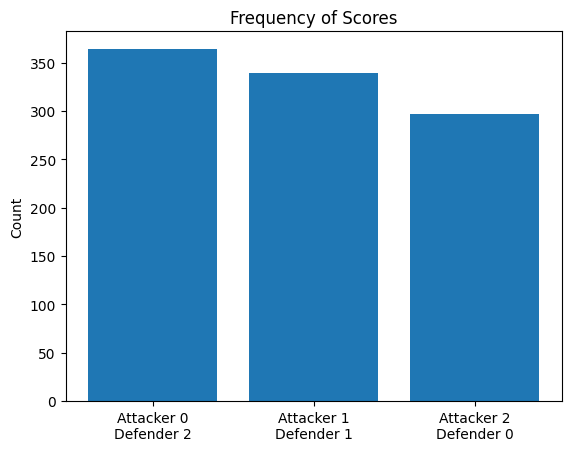

round_attacker_losses
0    364
1    339
2    297
Name: count, dtype: int64


In [6]:
# Display the frequncy of round scores
y = np.array(round_scores['round_attacker_losses'].value_counts())

x = np.array(['Attacker 0\nDefender 2', 'Attacker 1\nDefender 1', 'Attacker 2\nDefender 0'])

plt.bar(x, y)
plt.title('Frequency of Scores')
plt.ylabel('Count')
plt.show()

print(round_scores['round_attacker_losses'].value_counts())

For extra marks: a more complicated version that simulates a full series of rounds for armies of arbitrary sizes, until one side is wiped out.

The attacker army size at start of game: 239
The defender army size at start of game: 239
At the end of the game the attacker army size is: -6
At the end of the game the defender army size: 0
attacker losses:245
defender losses:239
 The number of rounds played: 242
   round attacker_dice defender_dice  round_attacker_losses  \
0      1     [5, 2, 1]        [5, 3]                      2   
1      2     [2, 2, 1]        [6, 4]                      2   
2      3     [6, 6, 5]        [3, 3]                      0   
3      4     [5, 3, 2]        [3, 1]                      0   
4      5     [6, 3, 3]        [1, 1]                      0   

   round_defender_losses  attacker_losses  defender_losses  \
0                      0                2                0   
1                      0                4                0   
2                      2                4                2   
3                      2                4                4   
4                      2                4    

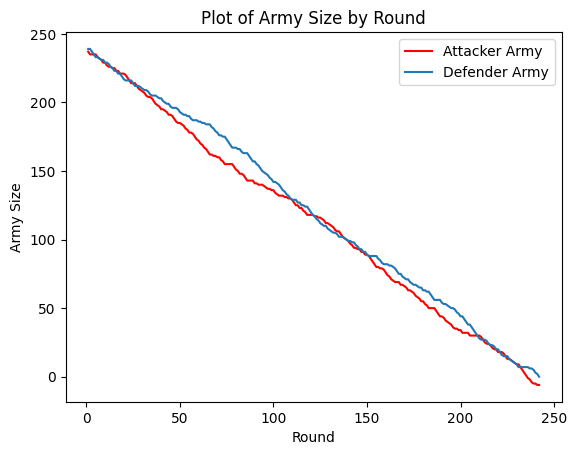

In [7]:
# Very very basic version with an army size initialised at start of battle. 

#https://numpy.org/doc/2.0/reference/random/generated/numpy.random.randint.html
# Random number to set the army size
attacker_army_size = random.randint(1, 1000)
print(f'The attacker army size at start of game: {attacker_army_size}')

# Both armies to have the same size, make the game fairer.
defender_army_size = attacker_army_size

print(f'The defender army size at start of game: {defender_army_size}')

attacker_losses = 0
defender_losses = 0

round_scores = []

for round in range(1, 1000):
    # Roll the attacker dice
    attacker_dice = roll_dice(3)
    # Roll the defender dice
    defender_dice = roll_dice(2)

    round_attacker_losses = 0
    round_defender_losses = 0

    # Calculate the losses.
    for a, d in zip(attacker_dice, defender_dice):
        if  a <= d:
            round_attacker_losses += 1
            attacker_army_size -=1
        else:
            round_defender_losses += 1
            defender_army_size -= 1

    attacker_losses += round_attacker_losses
    defender_losses += round_defender_losses
    
    
    # Append results to round_scores list.
    round_scores.append({
        'round': round,
        'attacker_dice': attacker_dice,
        'defender_dice': defender_dice,
        'round_attacker_losses': round_attacker_losses,
        'round_defender_losses': round_defender_losses,
        'attacker_losses': attacker_losses,
        'defender_losses': defender_losses,
        'attacker_army_size': attacker_army_size,
        'defender_army_size':defender_army_size})
    
    if attacker_army_size == 0 or defender_army_size == 0:
        break

print(f'At the end of the game the attacker army size is: {attacker_army_size}')

print(f'At the end of the game the defender army size: {defender_army_size}')

print(f'attacker losses:{attacker_losses}')

print(f'defender losses:{defender_losses}')
print(f' The number of rounds played: {len(round_scores)}')

# Plot the army size as the rounds progress.
round_scores = pd.DataFrame(round_scores)
print(round_scores.head())

plt.plot(round_scores['round'], round_scores['attacker_army_size'], color = 'r')
plt.plot(round_scores['round'], round_scores['defender_army_size'])
plt.title('Plot of Army Size by Round')

legend = ['Attacker Army', 'Defender Army']

plt.legend(legend)
plt.xlabel('Round')
plt.ylabel('Army Size')
plt.show()


In [8]:
def army_size():
    attacker_army_size = random.randint(1, 1000)
    print(f'The attacker army size at start of game: {attacker_army_size}')

# Both armies to have the same size, make the game fairer.
    defender_army_size = attacker_army_size

    print(f'The defender army size at start of game: {defender_army_size}')

    return attacker_army_size, defender_army_size

In [9]:
def army_calculate_losses(attacker_dice, defender_dice, attacker_army_size, defender_army_size):
    
    round_attacker_losses = 0
    round_defender_losses = 0

    # Calculate the losses.
    for a, d in zip(attacker_dice, defender_dice):
        if  a <= d:
            round_attacker_losses += 1
            attacker_army_size -= 1
        else:
            round_defender_losses += 1
            defender_army_size -= 1
    
    return round_attacker_losses, round_defender_losses, attacker_army_size, defender_army_size

In [10]:
def army_simulate_battle(num_rounds):

    attacker_army_size, defender_army_size = army_size()

    # Count to keep track of the overall losses for the attacker and defender
    attacker_losses = 0
    defender_losses = 0

    round_scores = []

    for round in range(1, num_rounds + 1):

        # Roll the attacker dice
        attacker_dice = roll_dice(3)

        # Roll the defender dice
        defender_dice = roll_dice(2)

        # Use calculate_losses function.
        round_attacker_losses, round_defender_losses, attacker_army_size, defender_army_size = army_calculate_losses(attacker_dice, defender_dice, attacker_army_size, defender_army_size)

        # Add the round losses to their respective overall losses count
        attacker_losses += round_attacker_losses
        defender_losses += round_defender_losses
        
        if attacker_army_size == 0 or defender_army_size == 0:
            break
    	# 
        round_scores.append({
        'round': round,
        'attacker_dice': attacker_dice,
        'defender_dice': defender_dice,
        'round_attacker_losses': round_attacker_losses,
        'round_defender_losses': round_defender_losses,
        'attacker_losses': attacker_losses,
        'defender_losses': defender_losses,
        'attacker_army_size': attacker_army_size,
        'defender_army_size':defender_army_size})

        

    return attacker_dice, defender_dice, attacker_losses, defender_losses, round_scores, attacker_army_size, defender_army_size


In [11]:
attacker_dice, defender_dice, attacker_losses, defender_losses, round_scores, attacker_army_size, defender_army_size = army_simulate_battle(1000)

The attacker army size at start of game: 166
The defender army size at start of game: 166


The defender lost the battle.
 Attackers Losses: 158
 Defenders Losses: 166


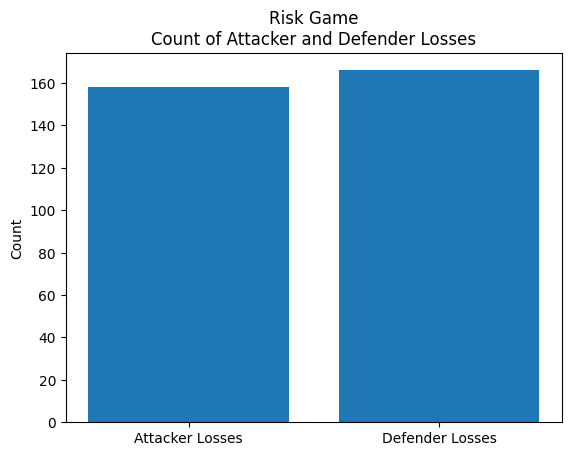

In [12]:
plot_results(attacker_losses, defender_losses)

In [13]:
round_scores = pd.DataFrame(round_scores)
round_scores.head()

,round,attacker_dice,defender_dice,round_attacker_losses,round_defender_losses,attacker_losses,defender_losses,attacker_army_size,defender_army_size
0,1,"[5, 2, 1]","[5, 4]",2,0,2,0,164,166
1,2,"[6, 5, 1]","[3, 3]",0,2,2,2,164,164
2,3,"[5, 2, 2]","[2, 1]",0,2,2,4,164,162
3,4,"[6, 3, 1]","[4, 1]",0,2,2,6,164,160
4,5,"[5, 2, 2]","[6, 1]",1,1,3,7,163,159


In [14]:
print(round_scores['round_attacker_losses'].value_counts())

round_attacker_losses
1    58
0    53
2    50
Name: count, dtype: int64


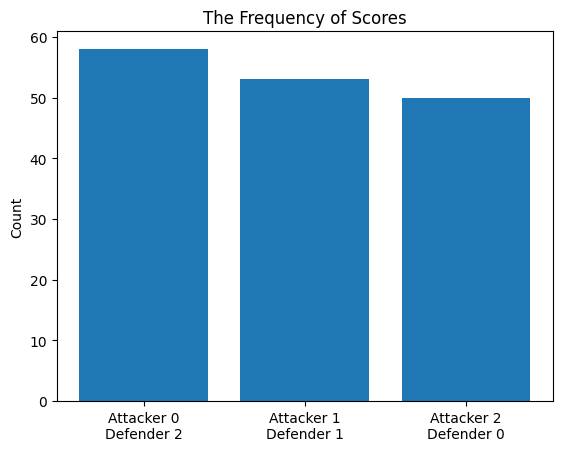

In [15]:
y = np.array(round_scores['round_attacker_losses'].value_counts())

x = np.array(['Attacker 0\nDefender 2', 'Attacker 1\nDefender 1', 'Attacker 2\nDefender 0'])

plt.bar(x, y)
plt.title('The Frequency of Scores')
plt.ylabel('Count')
plt.show()

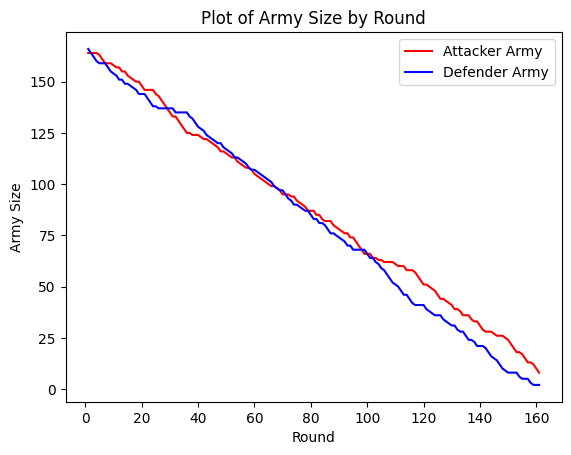

In [16]:
plt.plot(round_scores['round'], round_scores['attacker_army_size'], color = 'r')
plt.plot(round_scores['round'], round_scores['defender_army_size'], color = 'b')

plt.title('Plot of Army Size by Round')

legend = ['Attacker Army', 'Defender Army']

plt.legend(legend)
plt.xlabel('Round')
plt.ylabel('Army Size')
plt.show()

make .py containing all the functions for the game.


add commentary and references

In [17]:
print(len(round_scores))

161


__References__





 https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html

 Sort vs sorted https://www.w3schools.com/python/numpy/numpy_array_sort.asp Sort returns a copy leaving the original untouched.
 
 https://stackoverflow.com/questions/26984414/efficiently-sorting-a-numpy-array-in-descending-order